# 1.문제 정의
문제이름 : Dijkstra의 최단경로 알고리즘   
문제설명 : 한 정점에서 출발하여 다른 모든 정점으로 가는 최단거리를 찾는다.   
문제예시 : 정점리스트 vtx, 인접 행렬 adj, 시작 정점 인덱스 start를 입력받아 Dijkstra의 최단경로 알고리즘을 사용하여 최단거리를 찾는다.
# 2.알고리즘 설명
1. 정점의 수를 vsize에 저장한다.
2. 시작 정점으로부터 각 정점까지의 최단거리를 저장할 dist에 adj[start]로 초기화한다.
3. 모든 정점의 초기 경로를 시작정점으로 설정한다.
4. 최단 경로를 저장할 path에 모든 정점의 초기 경로를 시작정점으로 설정한다.
5. 각 정점이 최단 경로에 포함되어있는지 확인하기위해 초기값을 False로 지정하여 found에 저장하고, 시작 정점을 포함된 상태로 저장한다.
6. (외부루프)모든 정점을 순회하며 dist에서 최단 경로에 포함되지 않은 정점 중 최단거리를 가진 정점을 선택한다.
7. 선택한 정점을 found[u](최단경로 집합)에 저장한다.
8. (내부루프)모든 정점을 순회하며 정점 w가 최단 경로 집합에 포함되지 않은 경우에 선택된 정점을 통해 정점 w로 가는 거리가 dist[w]보다 작은 경우
9. dist[w]에 최단거리를 갱신해준다.
10. path[w]에 최단 경로를 갱신한다.
# 3.손으로 푼 예제
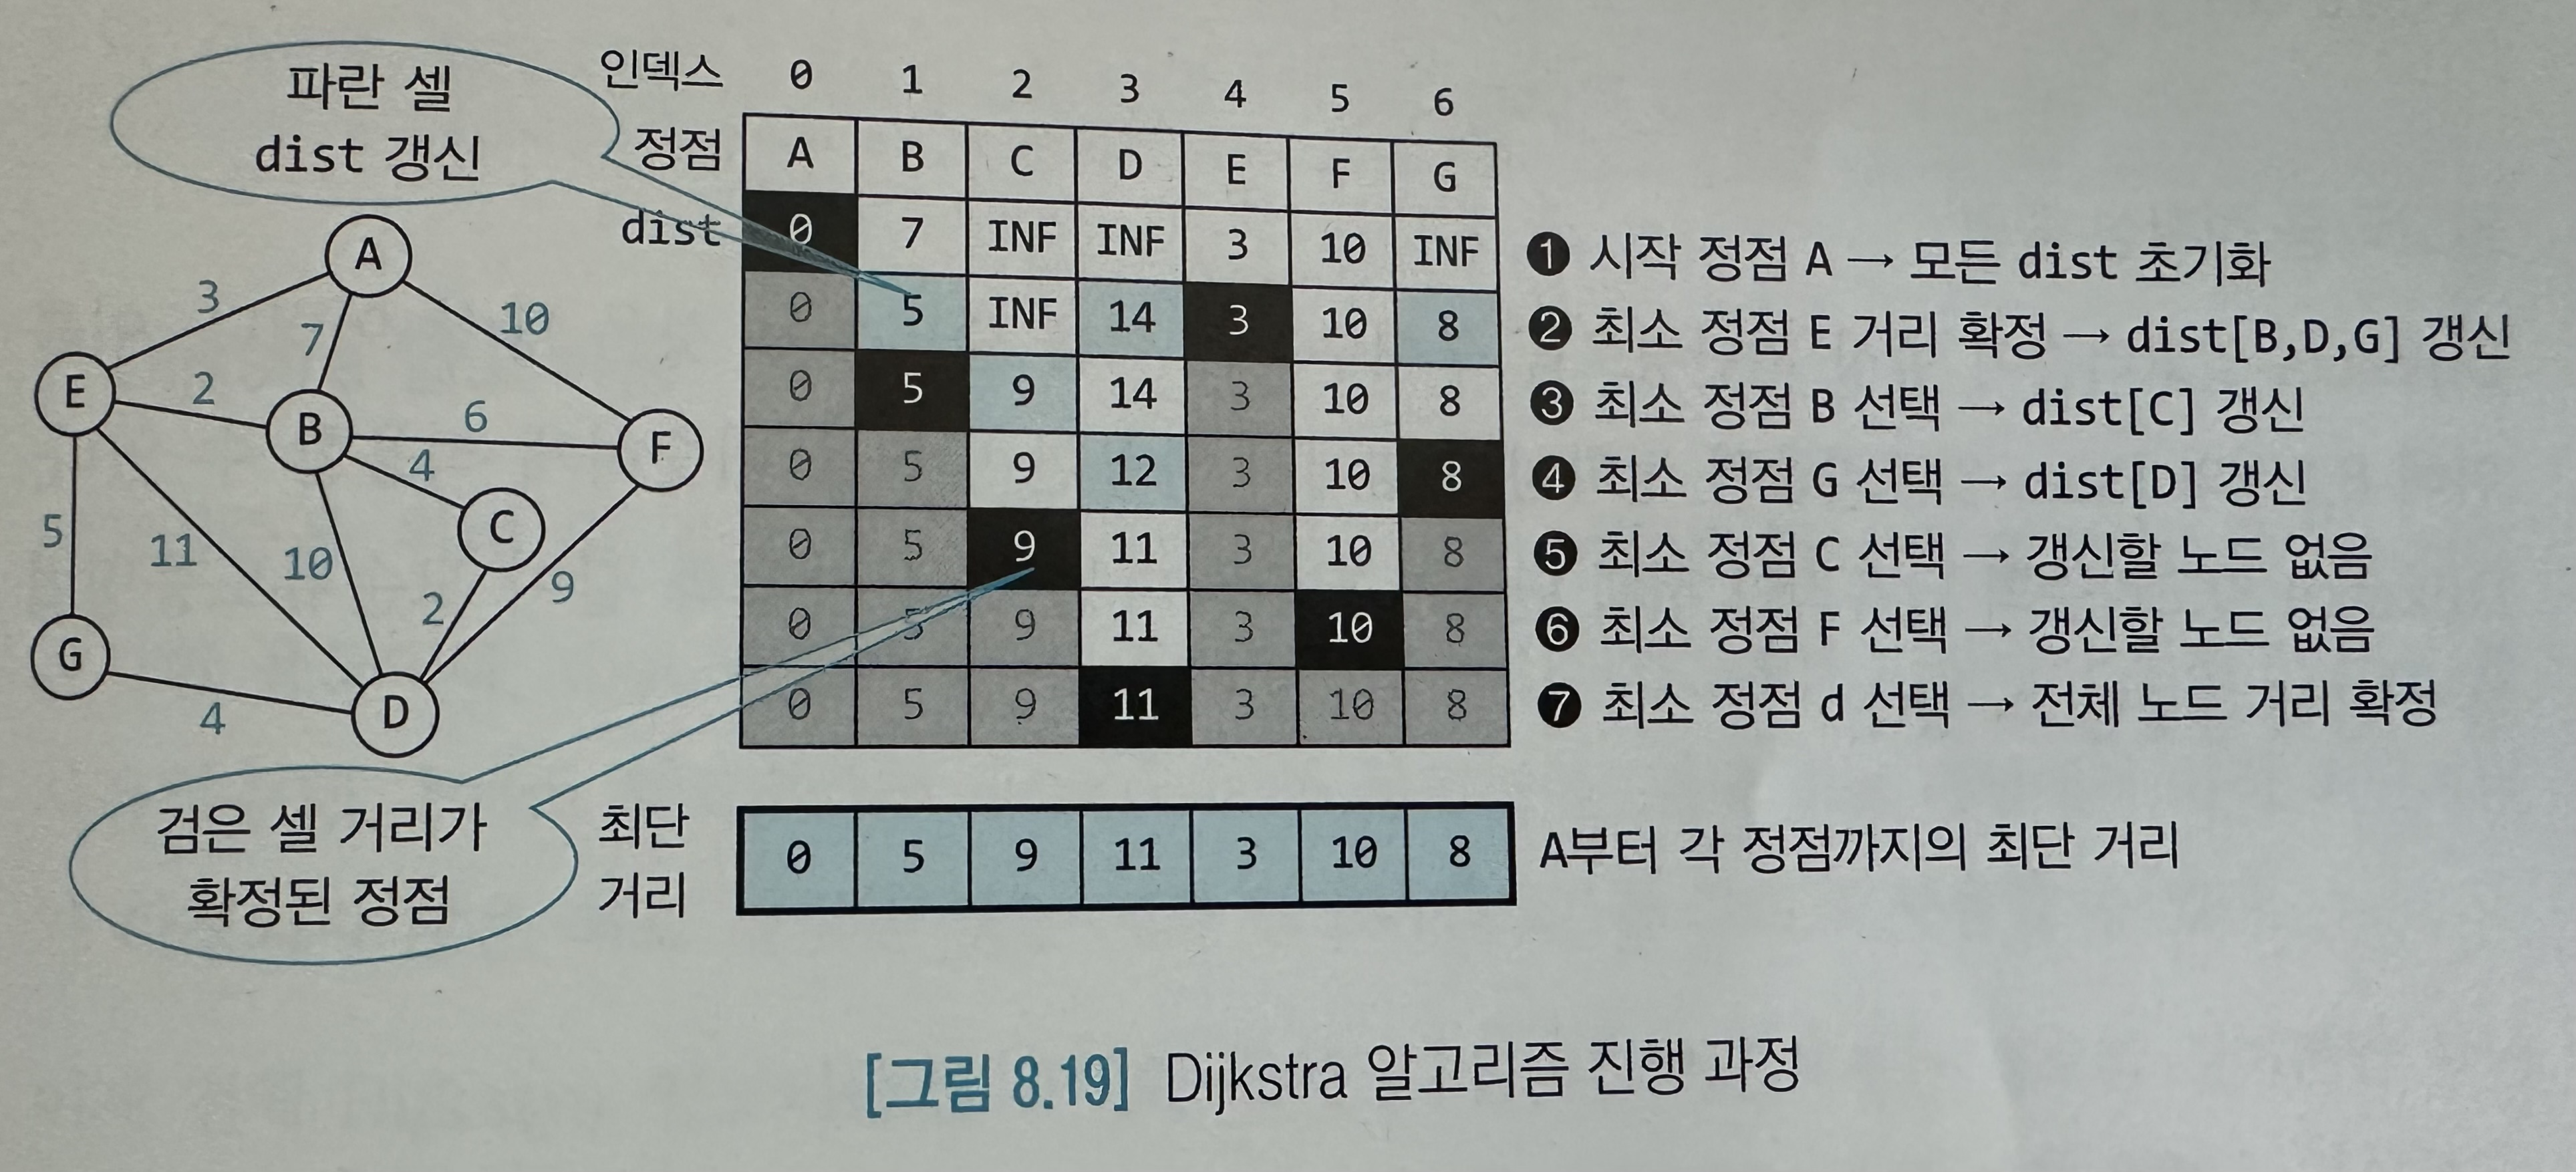
# 4.알고리즘 개요
명칭 : Dijkstra의 최단경로 알고리즘   
입력변수 : 정점리스트 vtx, 인접 행렬 adj, 시작 정점 인덱스 start   
출력 : 각 정점까지의 최단 경로를 저장한 리스트 path
# 5.알고리즘 코드

In [ ]:
def shortest_path_dijkstra(vtx, adj, start) :
    vsize = len(vtx)
    dist = list(adj[start])
    dist[start] = 0
    path = [start] * vsize
    found = [False] * vsize
    found[start] = True
    
    for i in range(vsize) :
        print("Step%2d: "%(i+1),dist)
        u = getMinVertex(dist, found)
        found[u] = True
        
        for w in range(vsize) :
            if not found[w] :
                if dist[u] + adj[u][w] < dist[w] :
                    dist[w] = dist[u] + adj[u][w]
                    path[w] = u
    return path

# 6.테스트 코드

In [4]:
INF = float('inf')

def getMinVertex(dist, selected) :
    minv = -1
    mindist = INF
    for v in range(len(dist)) :
        if not selected[v] and dist[v]<mindist :
            mindist = dist[v]
            minv = v
    return minv

def shortest_path_dijkstra(vtx, adj, start) :
    vsize = len(vtx)
    dist = list(adj[start])
    dist[start] = 0
    path = [start] * vsize
    found = [False] * vsize
    found[start] = True
    
    for i in range(vsize) :
        print("Step%2d: "%(i+1),dist)
        u = getMinVertex(dist, found)
        found[u] = True
        
        for w in range(vsize) :
            if not found[w] :
                if dist[u] + adj[u][w] < dist[w] :
                    dist[w] = dist[u] + adj[u][w]
                    path[w] = u
    return path

vertex = ['A', 'B', 'C', 'D', 'E', 'F', 'G' ]
weight = [ [   0,   7, INF, INF,   3,  10, INF ],
           [   7,   0,   4,  10,   2,   6, INF ],
           [ INF,   4,   0,   2, INF, INF, INF ],
           [ INF,  10,   2,   0,  11,   9,   4 ],
           [   3,   2, INF,  11,   0,  13,   5 ],
           [  10,   6, INF,   9,  13,   0, INF ],
           [ INF, INF, INF,   4,   5, INF,   0 ] ]

start = 0
path = shortest_path_dijkstra(vertex, weight, start)

for end in range(len(vertex)) :
    if end != start :
        print("[최단경로: %s->%s] %s" %
               (vertex[start], vertex[end], vertex[end]), end='')
        while (path[end] != start) :
            print(" <- %s" % vertex[path[end]], end='')
            end = path[end]
        print(" <- %s" % vertex[path[end]])

Step 1:  [0, 7, inf, inf, 3, 10, inf]
Step 2:  [0, 5, inf, 14, 3, 10, 8]
Step 3:  [0, 5, 9, 14, 3, 10, 8]
Step 4:  [0, 5, 9, 12, 3, 10, 8]
Step 5:  [0, 5, 9, 11, 3, 10, 8]
Step 6:  [0, 5, 9, 11, 3, 10, 8]
Step 7:  [0, 5, 9, 11, 3, 10, 8]
[최단경로: A->B] B <- E <- A
[최단경로: A->C] C <- B <- E <- A
[최단경로: A->D] D <- C <- B <- E <- A
[최단경로: A->E] E <- A
[최단경로: A->F] F <- A
[최단경로: A->G] G <- E <- A


# 7.수행 결과
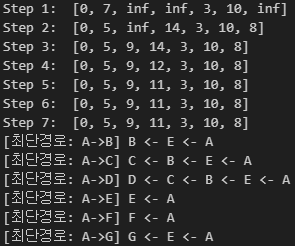
# 8.복잡도 분석
외부루프에서 정점의 개수만큼 반복하고, 내부루프에서 정점의 개수만큼 반복하므로 시간복잡도는   
$$o(n^2)이다.

# 9.작성자
AL8.8 작성자 : 202110501 박건호